In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/updated_pollution_dataset.csv')

In [ ]:
#pour avoir une idée sur mes données
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [ ]:
#afficher les noms des colonnes
data.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [ ]:
#pour détecter s'il y a des valeurs manquantes dans les données
data.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [19]:
import seaborn as sns

<Axes: xlabel='Air Quality', ylabel='count'>

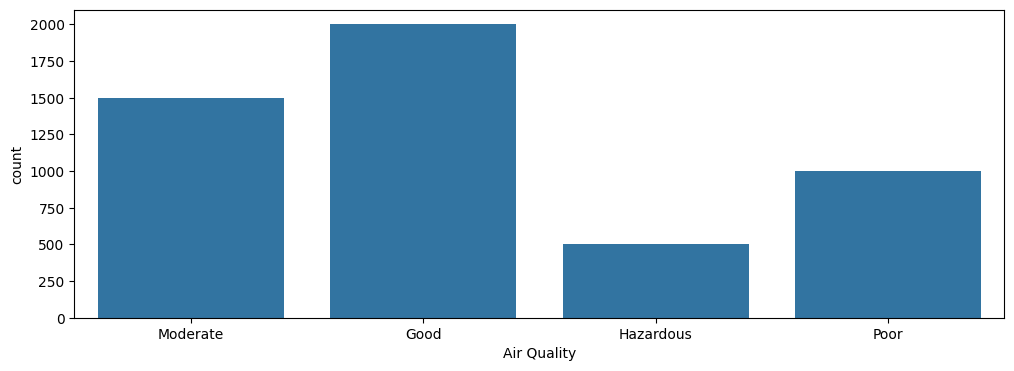

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='Air Quality',data=data)

In [30]:
cdf = data.copy()

In [32]:
values = {
    'Good': 0,
    'Moderate': 1,
    'Hazardous': 2,
    'Poor': 3
}
cdf['Air Quality'] = cdf['Air Quality'].replace(values)

<ipython-input-32-fef610930155>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdf['Air Quality'] = cdf['Air Quality'].replace(values)


<Axes: >

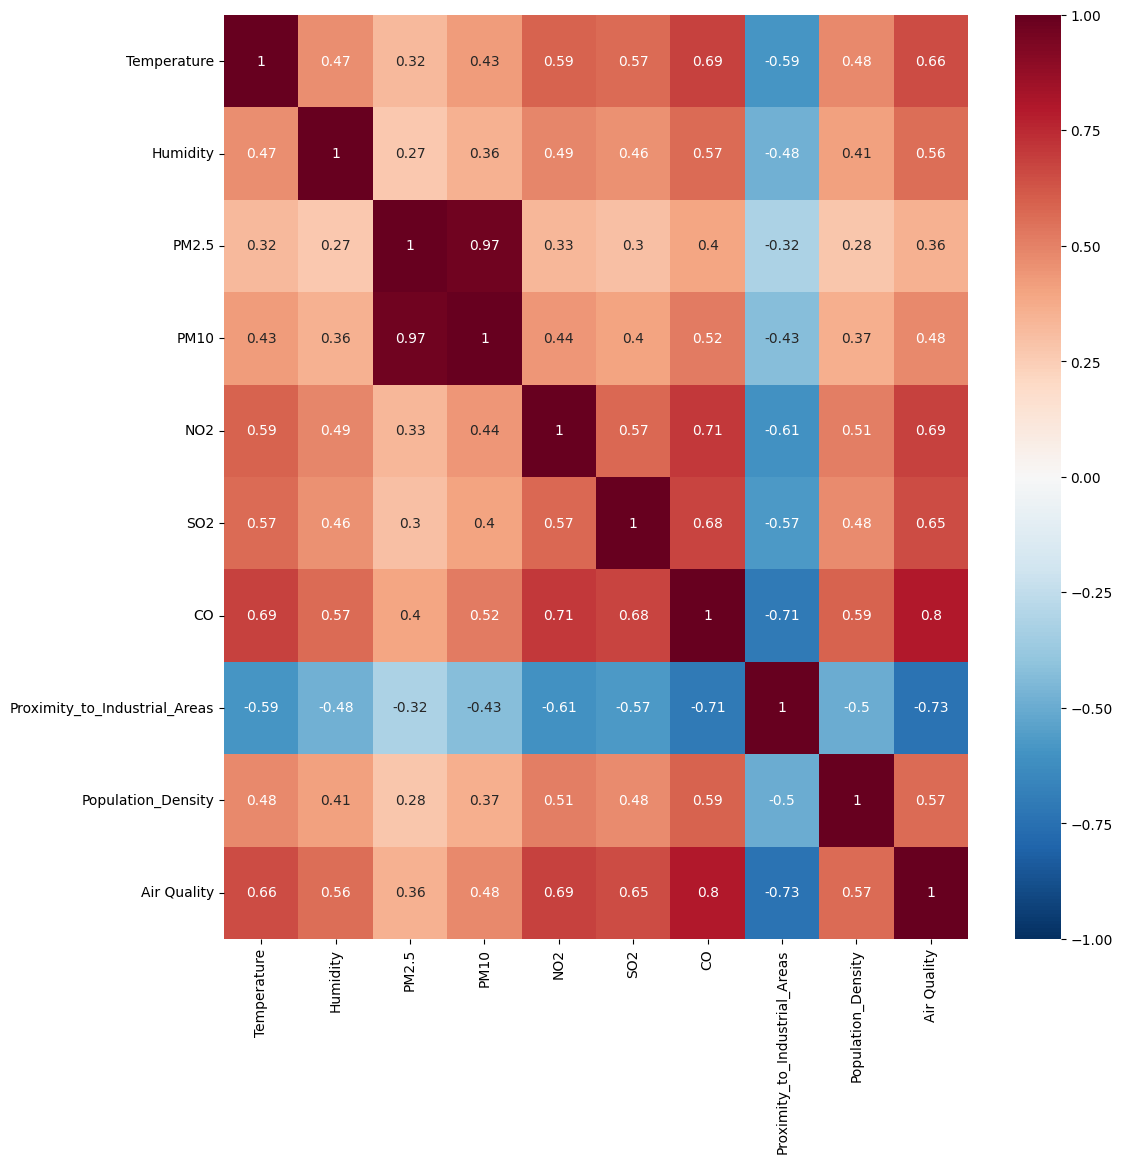

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(cdf.corr(),vmin=-1,center=0,cmap='RdBu_r',annot=True)

In [61]:
from sklearn.preprocessing import StandardScaler

x=cdf.drop('Air Quality',axis=1)
y=cdf['Air Quality']
x_scaled = StandardScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917
...,...,...,...,...,...,...,...,...,...
4995,1.573065,0.254942,3.904265,3.528121,2.146042,2.323858,1.116625,-1.558031,1.751855
4996,-0.287057,1.692340,-0.539349,-0.190824,-0.125033,0.116329,0.072615,-0.754837,1.385216
4997,-0.614438,0.513421,-0.242022,-0.296871,0.943047,-0.328140,0.237459,0.325321,-0.775335
4998,-0.703724,-1.617459,0.051232,-0.044553,-0.304920,-0.639268,-1.117922,0.879249,-1.678839


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_trai,y_test=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
testscore=[]
trainscore=[]
for i in range (1,20):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_trai)
    trainscore.append(knn.score(x_train,y_trai))
    testscore.append(knn.score(x_test,y_test))

<Axes: >

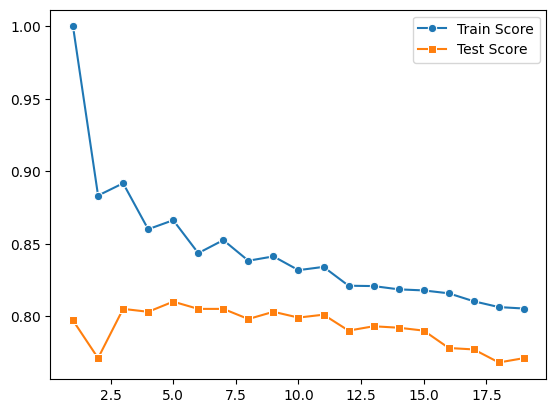

In [69]:
sns.lineplot(x=range(1, 20), y=trainscore, marker='o', label='Train Score')
sns.lineplot(x=range(1, 20), y=testscore, marker='s', label='Test Score')

K = 15

In [70]:
knn=KNeighborsClassifier(15)
knn.fit(x_train,y_trai)

KNeighborsClassifier(n_neighbors=15)

In [71]:
y_pred = knn.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are defined
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.79


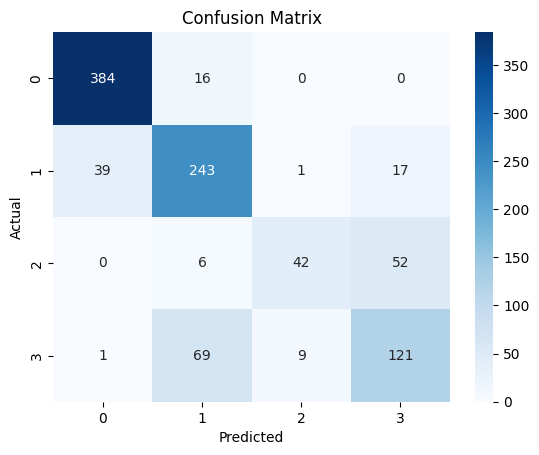

In [75]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3]
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()